Index : 190557V
Name : Sandaruwan K.G.C.P
Assignment 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg

(1)

In [15]:
def setCircle(b, c, d):
  temp = c[0]**2 + c[1]**2
  bc = (b[0]**2 + b[1]**2 - temp) / 2
  cd = (temp - d[0]**2 - d[1]**2) / 2
  det = (b[0] - c[0]) * (c[1] - d[1]) - (c[0] - d[0]) * (b[1] - c[1])

  if abs(det) < 1.0e-10:
    return None
    
  cx = (bc*(c[1] - d[1]) - cd*(b[1] - c[1])) / det
  cy = ((b[0] - c[0]) * cd - (c[0] - d[0]) * bc) / det

  radius = ((cx - b[0])**2 + (cy - b[1])**2)**.5

  return cx,cy,radius

def minDistance(p,x,y,r):
    re= np.array(abs(((p[:,0]-x)**2+(p[:,1]-y)**2)**0.5-r))
    return re

def plotCircle(Data,Datalst,color='r'):
    x,y,r=setCircle(Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]])
    c=plt.Circle((x,y),r,fill=False)
    c.set_color(color)
    return c


In [16]:
# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )

In [19]:
def ransac(Data,N,t,n):
    max_i=0
    output=np.array([])

    for i in range(N):
        randomPoints=np.random.choice(Data.size//2, size=3, replace=False)
        x,y,r=setCircle(Data[randomPoints[0]],Data[randomPoints[1]],Data[randomPoints[2]])
        PO=minDistance(Data,x,y,r)
        if r>max(Data[:,1])*1.5:
            continue
        inliers=Data[PO<t]
        if len(inliers)>n:
            me=minDistance(inliers,x,y,r)
            mean = sum(me/me.size)
            if max_i < len(inliers):
                best=mean
                output=randomPoints
                il=inliers
            elif max_i == len(inliers) and best>mean:
                best=mean
                output=randomPoints
                il=inliers
    return output,il

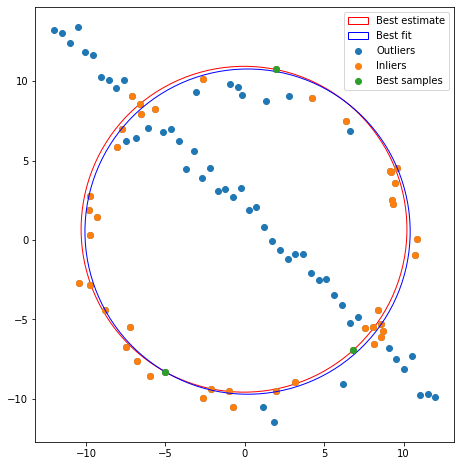

In [20]:
ranL,bestInlier=ransac(X,500,1,40)          
c=plotCircle(ranL,X)
fig,ax=plt.subplots(figsize=(8,8))
ax.set_aspect( 1 )
ax.add_artist( c )
p1=ax.scatter(X[:,0],X[:,1])
p2=ax.scatter(bestInlier[:,0],bestInlier[:,1])
bestfit,inl=ransac(bestInlier,50,1,bestInlier.size//2.2)
c2=plotCircle(bestfit,bestInlier,'b')
ax.add_artist( c2 )
Y=np.vstack((X[ranL[0]],X[ranL[1]],X[ranL[2]]))
p3=ax.scatter(Y[:,0],Y[:,1])
plt.legend(handles=[c, c2,p1,p2,p3],labels=['Best estimate','Best fit','Outliers','Inliers','Best samples'])
plt.show()